In [20]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [5]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


<AxesSubplot:xlabel='Date'>

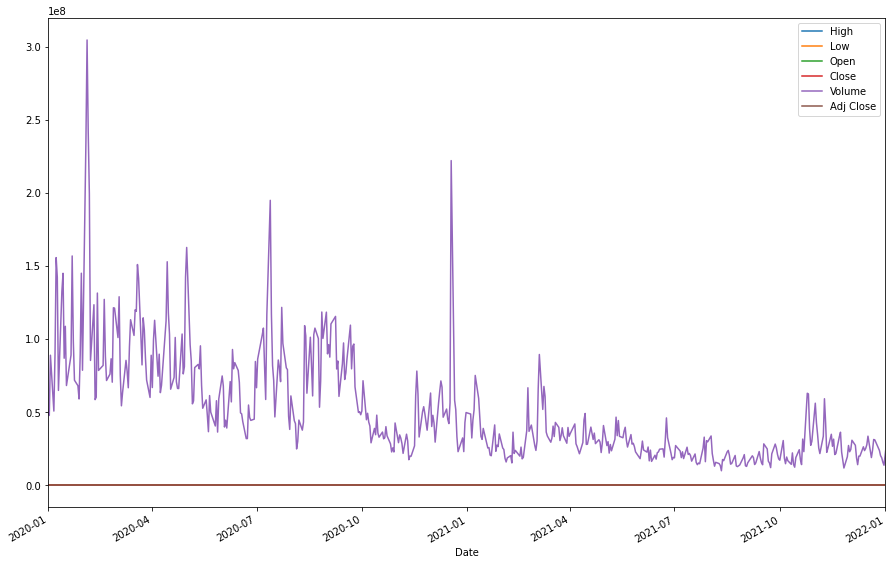

In [18]:
df_tesla.plot(xlim = ['2020-01-01','2022-01-01'],figsize = (15,10))

<AxesSubplot:xlabel='Date'>

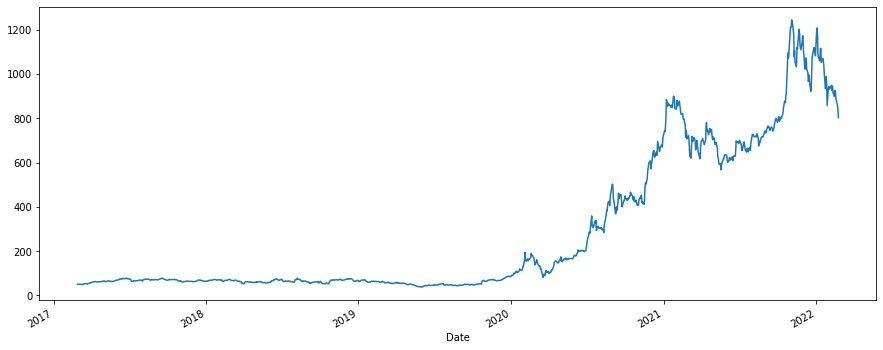

In [11]:
df_tesla.High.plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

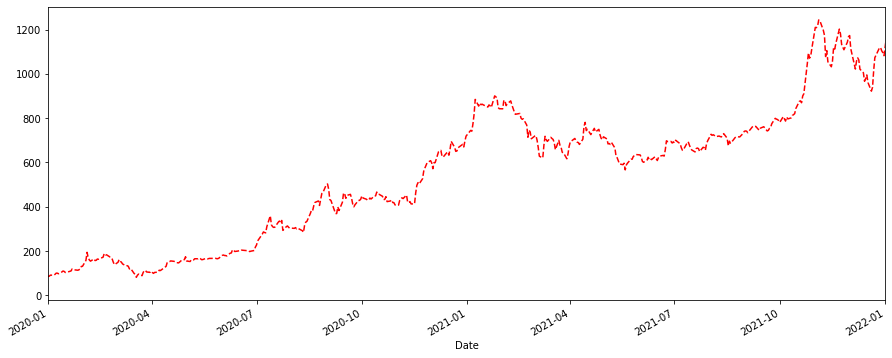

In [17]:
## Xlimit and Ylimit
df_tesla.High.plot(xlim = ['2020-01-01','2022-01-01'],figsize = (15,6),ls='--',c='red')

In [25]:
# taking data from specific range
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

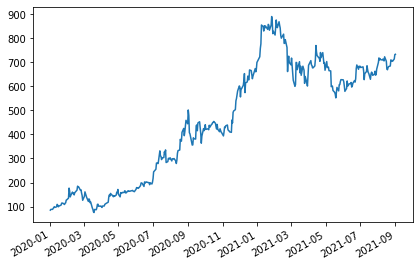

In [26]:
#Using subplot
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open);

In [27]:
#Using of date time
df_tesla = df_tesla.reset_index()

In [28]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [30]:
df_tesla = df_tesla.set_index('Date')
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-02-27 to 2022-02-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [31]:
datetime.now()

datetime.datetime(2022, 2, 25, 20, 23, 13, 928144)

In [32]:
date = datetime.now()

In [33]:
date.day

25

In [34]:
date.month

2

In [36]:
date.weekday()

4

## Time Resampling

In [37]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [39]:
#rule A mean year end frequency
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


<AxesSubplot:xlabel='Date'>

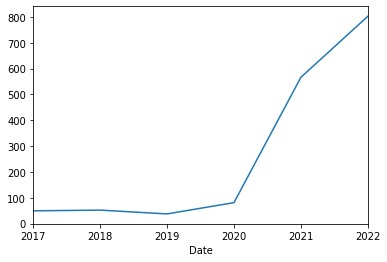

In [40]:
df_tesla.resample(rule='A').min()['High'].plot()

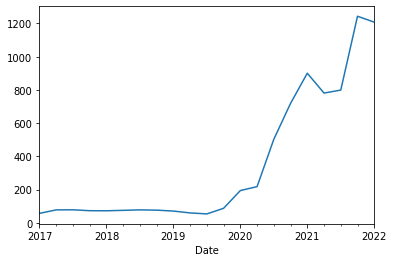

In [41]:
#Quaterly Start Frequency
df_tesla.resample(rule='QS').max()['High'].plot();

In [42]:
#Bussiness End Frequency
df_tesla.resample(rule='BA').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-30,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


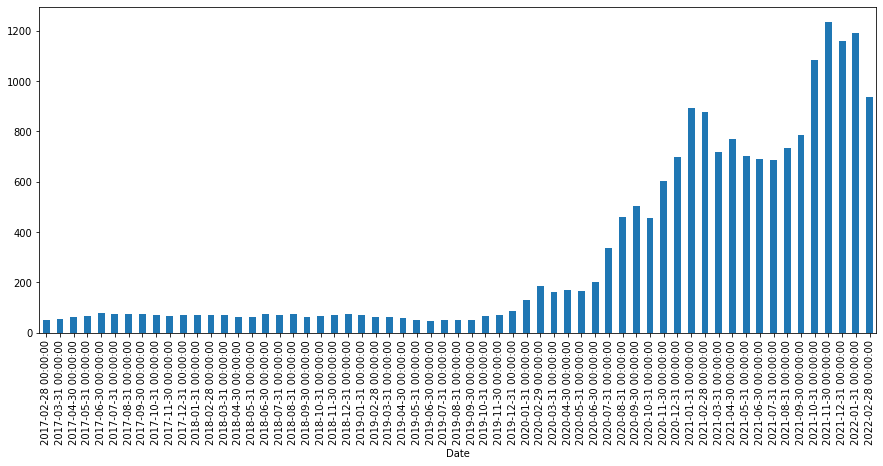

In [44]:
#monthly max
df_tesla['Open'].resample(rule='M').max().plot(figsize = (15,6),kind='bar');

### Rolling data

In [45]:
df_tesla['30_day_Open_Rolling'] = df_tesla.Open.rolling(30).mean()

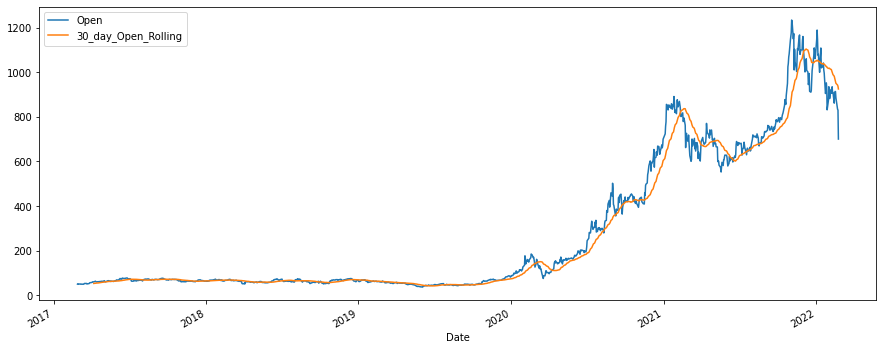

In [47]:
df_tesla[['Open','30_day_Open_Rolling']].plot(figsize = (15,6));

- Assignment
    1. Read Microsoft data using Panda Data Reader
    2. find Max price of the share from 2017-2022
    3. Date which Stock market has Highest value
    4. Date which Stock market has Lowest value

In [51]:
#Read Microsoft data using Panda Data Reader
Microsoft_df = pdr.get_data_yahoo('MSFT')

In [52]:
Microsoft_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,64.540001,64.050003,64.540001,64.230003,15871500.0,59.957737
2017-02-28,64.199997,63.759998,64.080002,63.980000,23239800.0,59.724358
2017-03-01,64.989998,64.019997,64.129997,64.940002,26937500.0,60.620502
2017-03-02,64.750000,63.880001,64.690002,64.010002,24539600.0,59.752365
2017-03-03,64.279999,63.619999,63.990002,64.250000,18135900.0,59.976391


<AxesSubplot:xlabel='Date'>

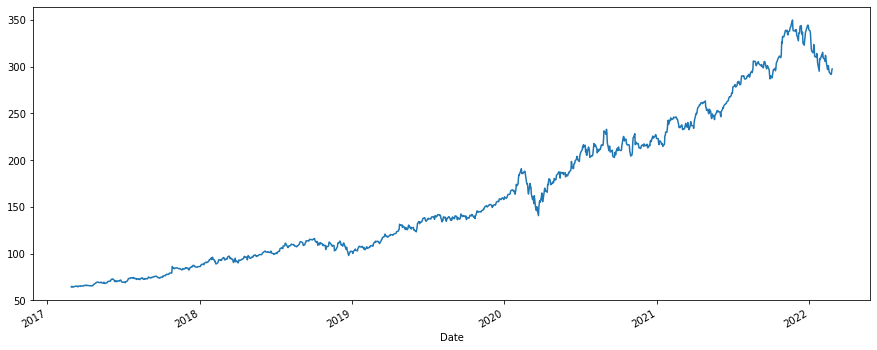

In [56]:
Microsoft_df.High.plot(figsize = (15,6))

In [55]:
#find Max price of the share from 2017-2022
Microsoft_df[Microsoft_df.High==Microsoft_df.High.max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-22,349.670013,339.549988,344.619995,339.829987,31031100.0,339.128754


In [63]:
Microsoft_df.resample('M').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,64.540001,64.050003,64.540001,64.230003,23239800.0,59.957737
2017-03-31,66.190002,65.449997,65.650002,65.860001,49219700.0,61.479309
2017-04-30,69.139999,67.690002,68.910004,68.459999,39548800.0,63.906368
2017-05-31,70.739998,69.809998,70.529999,70.410004,34956000.0,66.103416
2017-06-30,72.889999,72.269997,72.639999,72.519997,49187400.0,68.084351
...,...,...,...,...,...,...
2021-10-31,332.000000,323.899994,324.329987,331.619995,52588700.0,330.331360
2021-11-30,349.670013,342.200012,344.619995,343.109985,42885600.0,342.402008
2021-12-31,344.299988,340.320007,343.149994,342.540009,47750300.0,341.833191


In [64]:
#Date which Stock market has Highest value
Microsoft_df[Microsoft_df.High==Microsoft_df.High.max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-22,349.670013,339.549988,344.619995,339.829987,31031100.0,339.128754


In [65]:
#Date which Stock market has Lowest value
Microsoft_df[Microsoft_df.High==Microsoft_df.High.min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,64.199997,63.759998,64.080002,63.98,23239800.0,59.724358
